<a href="https://colab.research.google.com/github/VishnunandP/star-spectral-classification./blob/main/Stellar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# Upload dataset manually
from google.colab import files
uploaded = files.upload()



Saving stars.csv to stars.csv


In [3]:
# Load dataset
df = pd.read_csv('stars.csv')
print(df.head())


             proper         ra        dec    dist    mag  absmag     ci  \
0               Sol   0.000000   0.000000  0.0000 -26.70   4.850  0.656   
1  Proxima Centauri  14.495985 -62.679485  1.2959  11.01  15.447  1.807   
2   Rigil Kentaurus  14.660765 -60.833976  1.3248  -0.01   4.379  0.710   
3               NaN  14.660346 -60.838300  1.3248   1.35   5.739  0.900   
4    Barnard's Star  17.963472   4.693388  1.8238   9.54  13.235  1.570   

          temp         x         y         z  con       lum    var  var_min  \
0  5756.588113  0.000005  0.000000  0.000000  NaN  1.000000    NaN      NaN   
1  3383.441193 -0.472264 -0.361451 -1.151219  Cen  0.000058   V645   11.079   
2  5567.728737 -0.495203 -0.414084 -1.156625  Cen  1.543121    NaN    0.113   
3  4996.415833 -0.495181 -0.413973 -1.156674  Cen  0.440961    NaN      NaN   
4  3691.168543 -0.017373 -1.816613  0.149123  Oph  0.000443  V2500    9.590   

   var_max  
0      NaN  
1   10.939  
2   -0.087  
3      NaN  
4    9.49

In [4]:
# Map the color index (ci) to spectral classes
def map_to_spectral_class(ci):
    if ci < 0.0:
        return 'O'
    elif 0.0 <= ci < 0.3:
        return 'B'
    elif 0.3 <= ci < 0.6:
        return 'A'
    elif 0.6 <= ci < 0.9:
        return 'F'
    elif 0.9 <= ci < 1.5:
        return 'G'
    elif 1.5 <= ci < 1.9:
        return 'K'
    else:
        return 'M'

# Add a Spectral_Class column
df['Spectral_Class'] = df['ci'].apply(map_to_spectral_class)

# Display the dataset with the new column
print(df[['proper', 'ci', 'Spectral_Class']].head())


             proper     ci Spectral_Class
0               Sol  0.656              F
1  Proxima Centauri  1.807              K
2   Rigil Kentaurus  0.710              F
3               NaN  0.900              G
4    Barnard's Star  1.570              K


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119614 entries, 0 to 119613
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   proper          146 non-null     object 
 1   ra              119614 non-null  float64
 2   dec             119614 non-null  float64
 3   dist            119614 non-null  float64
 4   mag             119614 non-null  float64
 5   absmag          119614 non-null  float64
 6   ci              117732 non-null  float64
 7   temp            117732 non-null  float64
 8   x               119614 non-null  float64
 9   y               119614 non-null  float64
 10  z               119614 non-null  float64
 11  con             117984 non-null  object 
 12  lum             119614 non-null  float64
 13  var             5990 non-null    object 
 14  var_min         16991 non-null   float64
 15  var_max         16991 non-null   float64
 16  Spectral_Class  119614 non-null  object 
dtypes: float64

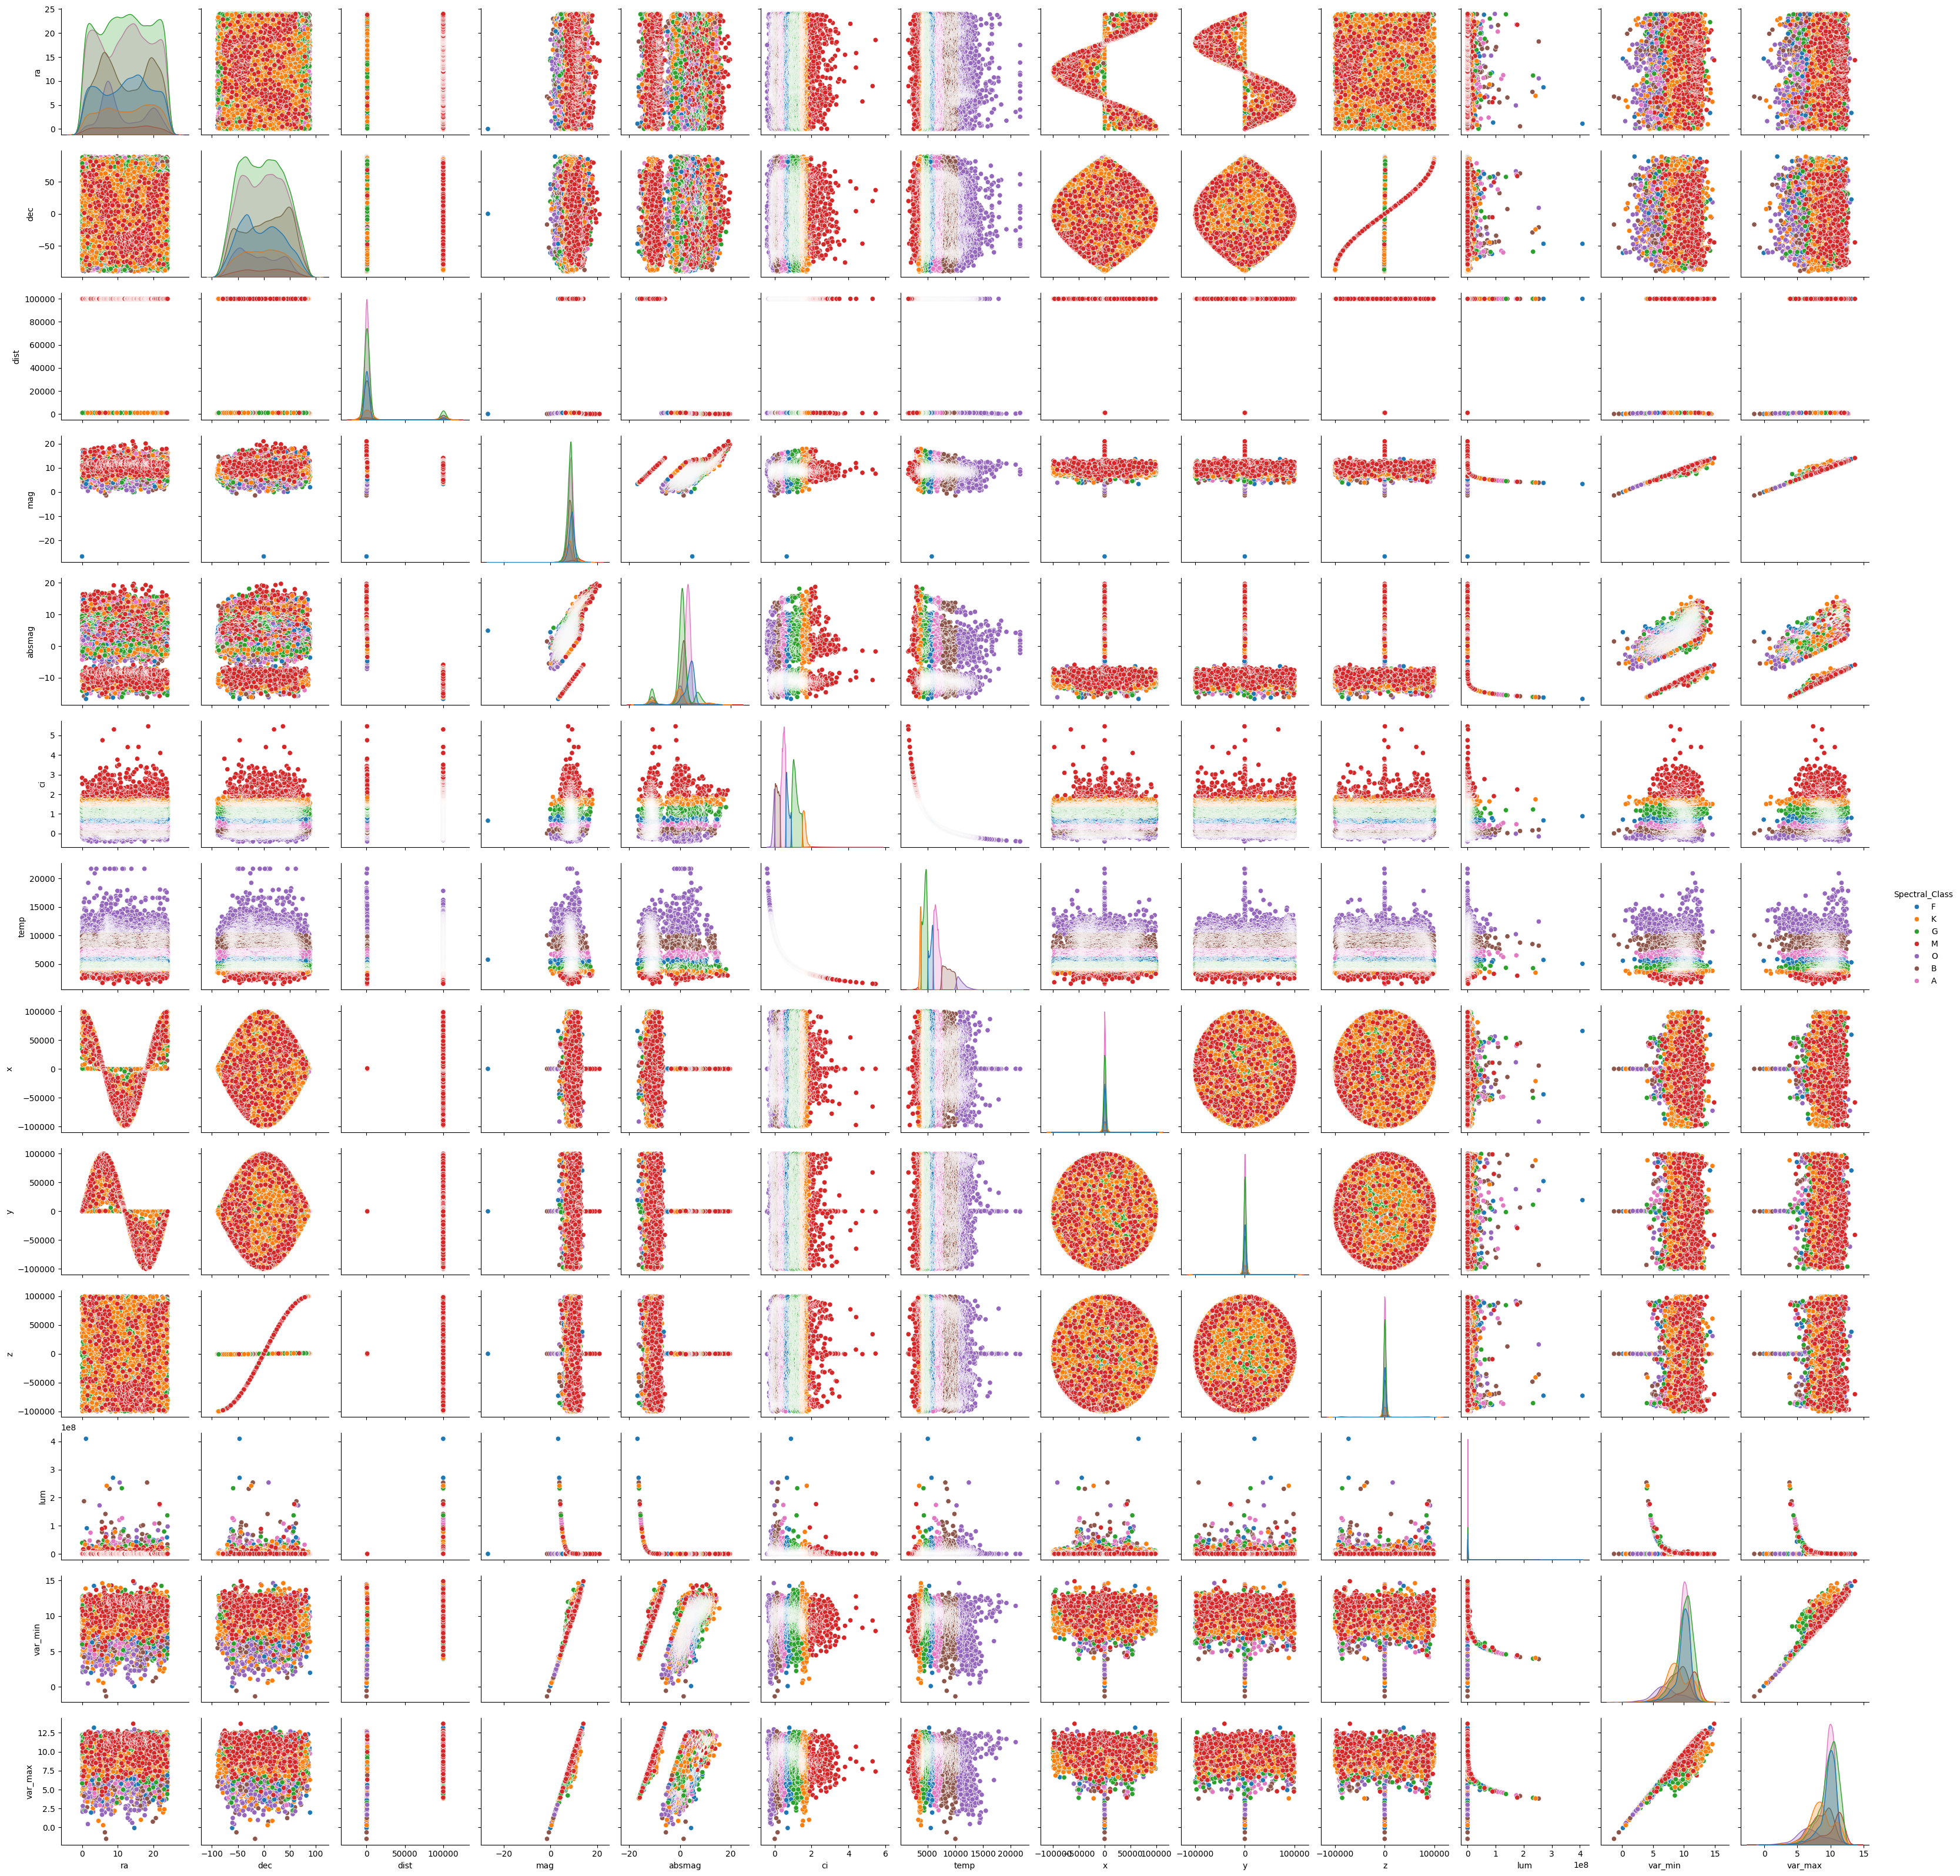

Missing values: 
proper            119468
ra                     0
dec                    0
dist                   0
mag                    0
absmag                 0
ci                  1882
temp                1882
x                      0
y                      0
z                      0
con                 1630
lum                    0
var               113624
var_min           102623
var_max           102623
Spectral_Class         0
dtype: int64
Classes: ['A' 'B' 'F' 'G' 'K' 'M' 'O']


In [5]:
# Display dataset information
print(df.info())
print(df.describe())

# Visualizing correlations
sns.pairplot(df, hue='Spectral_Class')
plt.show()

# Check for null values
print(f"Missing values: \n{df.isnull().sum()}")

# Encoding categorical variables
label_encoder = LabelEncoder()
df['Spectral_Class'] = label_encoder.fit_transform(df['Spectral_Class'])

# Inspect the encoded classes
print(f"Classes: {label_encoder.classes_}")


In [6]:
# Ensure Spectral_Class is created first
X = df.drop(columns=['Spectral_Class'])  # Features
y = df['Spectral_Class']                # Labels


In [7]:
# Verify dataset structure
print("Columns in dataset:", df.columns)

# If Spectral_Class is not created yet, add it
if 'Spectral_Class' not in df.columns:
    def map_to_spectral_class(ci):
        if ci < 0.0:
            return 'O'
        elif 0.0 <= ci < 0.3:
            return 'B'
        elif 0.3 <= ci < 0.6:
            return 'A'
        elif 0.6 <= ci < 0.9:
            return 'F'
        elif 0.9 <= ci < 1.5:
            return 'G'
        elif 1.5 <= ci < 1.9:
            return 'K'
        else:
            return 'M'
    df['Spectral_Class'] = df['ci'].apply(map_to_spectral_class)

# Split features and labels
X = df.drop(columns=['Spectral_Class'])
y = df['Spectral_Class']

# Verify the split
print("Feature set preview:")
print(X.head())

print("Label set preview:")
print(y.head())


Columns in dataset: Index(['proper', 'ra', 'dec', 'dist', 'mag', 'absmag', 'ci', 'temp', 'x', 'y',
       'z', 'con', 'lum', 'var', 'var_min', 'var_max', 'Spectral_Class'],
      dtype='object')
Feature set preview:
             proper         ra        dec    dist    mag  absmag     ci  \
0               Sol   0.000000   0.000000  0.0000 -26.70   4.850  0.656   
1  Proxima Centauri  14.495985 -62.679485  1.2959  11.01  15.447  1.807   
2   Rigil Kentaurus  14.660765 -60.833976  1.3248  -0.01   4.379  0.710   
3               NaN  14.660346 -60.838300  1.3248   1.35   5.739  0.900   
4    Barnard's Star  17.963472   4.693388  1.8238   9.54  13.235  1.570   

          temp         x         y         z  con       lum    var  var_min  \
0  5756.588113  0.000005  0.000000  0.000000  NaN  1.000000    NaN      NaN   
1  3383.441193 -0.472264 -0.361451 -1.151219  Cen  0.000058   V645   11.079   
2  5567.728737 -0.495203 -0.414084 -1.156625  Cen  1.543121    NaN    0.113   
3  4996.415833 -0

In [9]:
print(df.columns)


Index(['proper', 'ra', 'dec', 'dist', 'mag', 'absmag', 'ci', 'temp', 'x', 'y',
       'z', 'con', 'lum', 'var', 'var_min', 'var_max', 'Spectral_Class'],
      dtype='object')


In [10]:
# Define features and labels
X = df.drop(columns=['Spectral_Class'])  # Features (all except Spectral_Class)
y = df['Spectral_Class']                # Labels (Spectral_Class)

# Print shapes to confirm
print("Features shape:", X.shape)
print("Labels shape:", y.shape)


Features shape: (119614, 16)
Labels shape: (119614,)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Separate numeric and non-numeric columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Handle missing values
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())  # Fill numeric missing values with column mean
X[categorical_cols] = X[categorical_cols].fillna('Unknown')      # Fill non-numeric missing values with 'Unknown'

# Encode categorical columns
for col in categorical_cols:
    label_encoder = LabelEncoder()
    X[col] = label_encoder.fit_transform(X[col])

# Normalize numeric data
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Encode the target variable (Spectral_Class)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (83729, 16)
Testing set shape: (35885, 16)


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,887 (42.53 KB)

 Trainable params: 10,887 (42.53 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.2723 - loss: 4.8271 - val_accuracy: 0.3056 - val_loss: 1.7016
Epoch 2/50
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3050 - loss: 1.7000 - val_accuracy: 0.3057 - val_loss: 1.6975
Epoch 3/50
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3053 - loss: 1.6995 - val_accuracy: 0.3057 - val_loss: 1.6974
Epoch 4/50
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3043 - loss: 1.6973 - val_accuracy: 0.3057 - val_loss: 1.6974
Epoch 5/50
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3056 - loss: 1.6982 - val_accuracy: 0.3057 - val_loss: 1.6976
Epoch 6/50
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3046 - loss: 1.6951 - val_accuracy: 0.3057 - val_loss: 1.6976
Epoch 7/50
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3038 - loss: 1.6950 - val_accuracy: 0.3057 - val_loss: 1.6976
Epoch 8/50
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3071 - loss: 1.7018 -

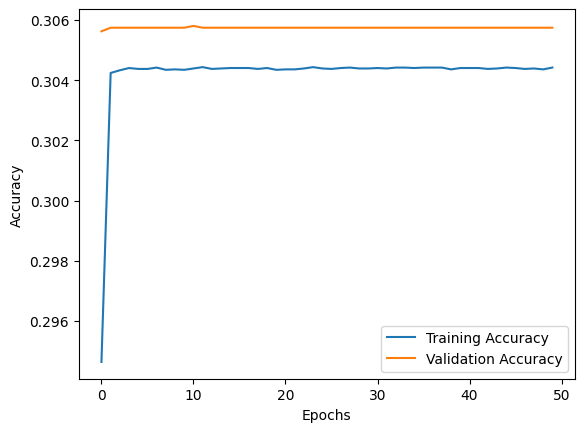

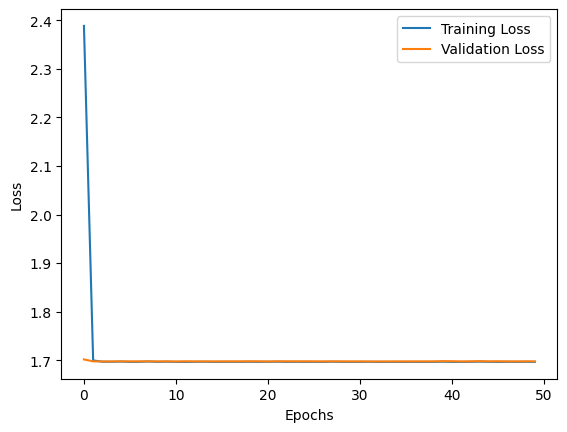

In [14]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Plot training and validation accuracy/loss
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [15]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 29.96%


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9503
           1       0.00      0.00      0.00      5711
           2       0.00      0.00      0.00      4690
           3       0.30      1.00      0.46     10751
           4       1.00      0.00      0.00      2454
           5       0.00      0.00      0.00       695
           6       0.00      0.00      0.00      2081

    accuracy                           0.30     35885
   macro avg       0.19      0.14      0.07     35885
weighted avg       0.16      0.30      0.14     35885



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


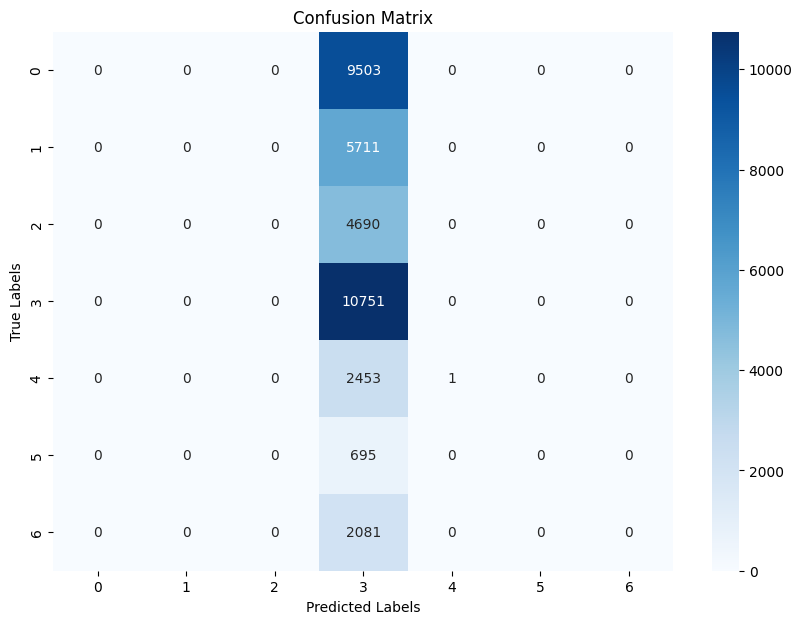

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert label_encoder.classes_ to strings to ensure compatibility
class_names = list(map(str, label_encoder.classes_))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
